In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [5]:
%matplotlib inline

# Dataset (Smaller)

In [6]:
df = pd.read_csv("dataset_small.csv")
df.head()


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


# Info about Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


In [5]:
df.corr()["phishing"]

qty_dot_url             0.140542
qty_hyphen_url          0.140790
qty_underline_url       0.150771
qty_slash_url           0.598533
qty_questionmark_url    0.094843
                          ...   
qty_redirects          -0.033534
url_google_index       -0.016519
domain_google_index    -0.003176
url_shortened           0.083984
phishing                1.000000
Name: phishing, Length: 112, dtype: float64

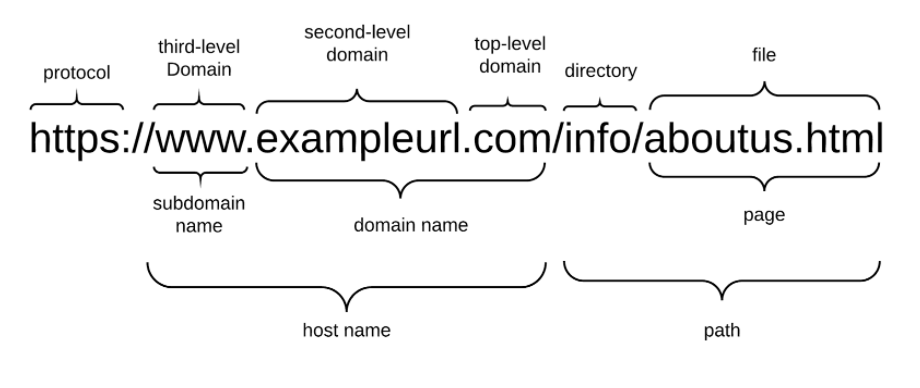

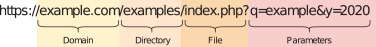

# Attributes based on the whole URL properties

In [65]:
df_url = df[['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url', 'email_in_url', "phishing"]].copy()

In [66]:
df_url.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.98, 0.99])

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,email_in_url,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,0.027709,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.093381,0.136331,0.370849,0.075802,0.122604,2.115804,0.305755,54.712657,0.164139,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,52.000000,0.000000,1.000000
85%,3.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,0.000000,1.000000
98%,6.000000,4.000000,2.000000,7.000000,0.000000,4.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,228.000000,1.000000,1.000000
99%,8.000000,7.000000,3.000000,8.000000,1.000000,6.000000,1.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,253.000000,1.000000,1.000000


In [67]:
df_url.corr()["phishing"]

qty_dot_url             0.140542
qty_hyphen_url          0.140790
qty_underline_url       0.150771
qty_slash_url           0.598533
qty_questionmark_url    0.094843
qty_equal_url           0.216086
qty_at_url              0.092955
qty_and_url             0.159362
qty_exclamation_url     0.023725
qty_space_url           0.016422
qty_tilde_url           0.041793
qty_comma_url           0.021081
qty_plus_url           -0.001522
qty_asterisk_url        0.017667
qty_hashtag_url         0.009676
qty_dollar_url          0.022333
qty_percent_url         0.002997
qty_tld_url             0.185442
length_url              0.381858
email_in_url            0.161147
phishing                1.000000
Name: phishing, dtype: float64

In [51]:
len(df_url.columns)

21

# Attributes based on Domain Properties

In [ ]:
df_domain = df[['qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain','domain_length',
 'domain_in_ip',
 'server_client_domain', "phishing"]].copy()

In [ ]:
df_domain.corr()["phishing"]

In [ ]:
df_domain.describe()

In [ ]:
df_domain.drop(['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
  'qty_underline_domain', 'server_client_domain'], inplace = True, axis = 1)

In [ ]:
df_domain.corr()

In [ ]:
df_domain.columns

In [ ]:
df_domain.corr()["phishing"]

# Attributes based on URL Directory

In [ ]:
df_directory = df[['qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length', "phishing"]].copy()

df_directory.head()

In [ ]:
df_directory.describe()

In [ ]:
df_directory.corr()["phishing"]

In [ ]:
new_df[new_df["directory_length"] > 200]

# Attributes based on URL File Name

In [ ]:
df_file_name = df[[ 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length', "phishing"]]

df_file_name.head()

In [ ]:
df_file_name.corr()["phishing"]

# Attributes based on URL Parameters

In [ ]:
df_url_parameters = df[['qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qty_questionmark_params',
 'qty_equal_params',
 'qty_at_params',
 'qty_and_params',
 'qty_exclamation_params',
 'qty_space_params',
 'qty_tilde_params',
 'qty_comma_params',
 'qty_plus_params',
 'qty_asterisk_params',
 'qty_hashtag_params',
 'qty_dollar_params',
 'qty_percent_params',
 'params_length',
 'tld_present_params',
 'qty_params', "phishing"]]

df_url_parameters.head()

In [ ]:
df_url_parameters.corr()["phishing"]

# Attributes based on the URL resolving data and external metrics

In [57]:
df_url_resolving = df[['email_in_url',
 'time_response',
 'domain_spf',
 'asn_ip',
 'time_domain_activation',
 'time_domain_expiration',
 'qty_ip_resolved',
 'qty_nameservers',
 'qty_mx_servers',
 'ttl_hostname',
 'tls_ssl_certificate',
 'qty_redirects',
 'url_google_index',
 'domain_google_index',
 'url_shortened',
 'phishing']]

df_url_resolving.head()

,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [ ]:
df_url_resolving.describe()

In [58]:
df_url_resolving.corr()["phishing"]

email_in_url              0.161147
time_response             0.056365
domain_spf                0.014032
asn_ip                    0.076841
time_domain_activation   -0.370977
time_domain_expiration   -0.145334
qty_ip_resolved          -0.011726
qty_nameservers          -0.135197
qty_mx_servers           -0.045346
ttl_hostname              0.137549
tls_ssl_certificate      -0.041551
qty_redirects            -0.033534
url_google_index         -0.016519
domain_google_index      -0.003176
url_shortened             0.083984
phishing                  1.000000
Name: phishing, dtype: float64

In [ ]:
df_url_resolving.columns

# Final DataSet

In [7]:
new_df = df.drop([
       
'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
       'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain',
       'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain',
       'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain',
       'qty_dollar_domain', 'qty_percent_domain',
 
 


 'qty_redirects', 'url_google_index','domain_google_index', 
 'url_shortened', 'domain_spf', 'asn_ip', 'ttl_hostname'


 ], axis = 1)






In [8]:
# Outliers Removal

# Sice 97th percentile of our data is less than 150
new_df = new_df.drop(new_df[new_df["length_url"] > 200].index).reset_index(drop = True)  # 1600 rows gone

# The expiry date of a domain can we never greater than 10 years and we need to renew it to upto 10 years

new_df = new_df.drop(new_df[new_df["time_domain_expiration"] > 3000].index).reset_index(drop = True)  # 600 rows gone


# Lets consider the activation date will be after 2000 so the activation time should be less than 30 years

new_df = new_df.drop(new_df[new_df["time_domain_activation"] > 10000].index).reset_index(drop = True)   # 120 rows gone



# Creating Dataset from the Given Link

In [9]:
import whois
from datetime import datetime
import requests
import dns.resolver
import tldextract
import yarl

class Url_DataFrame:
    """This class is mainly used to extract all the required features for our Machine Learning model from the given URL"""
    
    
    def __init__(self, url):
        self.link = url
        self.domain = self.domain_name_detect()
        
        self.df = pd.DataFrame(data = [0], columns = ["delete"])
        self.df.drop("delete", axis = 1, inplace = True)
        
        self.url_dataframe_preparation()
        
        
        
        
    def is_registered(self):
        """This method is used to check whether given url is registered or not and also assign no of days since it got activated
           and no of days it had to get expired."""
     
        try:
            whois_info = whois.whois(self.link)
            
            is_registered = bool(whois_info.domain_name)
        
        except Exception as e:
            is_registered = False
            print(e)
        
        finally:
            now_date = datetime.now()     #Present time but with no seconds given
            dt_string = now_date.strftime("%d/%m/%Y %H:%M:%S")      # Converting present time to string since we also need seconds
            dt_date = datetime.strptime(dt_string, '%d/%m/%Y %H:%M:%S')   # Converting string back to date time
        
        
            if is_registered:
                
                if type(whois_info.creation_date) == list:
                    creation_date = whois_info.creation_date[0]
                    
                else:
                    creation_date = whois_info.creation_date
                
                time_domain_activation = (dt_date) - (creation_date)
                
                if type(whois_info.expiration_date) == list:
                    expiry_date = whois_info.expiration_date[0]
                    
                else:
                    expiry_date = whois_info.expiration_date
                
                time_domain_expiration = (expiry_date) - (dt_date)
                self.df['time_domain_activation'] = time_domain_activation.days
                self.df['time_domain_expiration'] = time_domain_expiration.days
                    
            else:
                self.df['time_domain_activation'] = -1
                self.df['time_domain_expiration'] = -1
                
        
          
    def time_response(self):
        """This method is used to calculate the time response and if url contains email in it"""  
        
        # Checking for email in the url
        
        reg = re.findall(r"[A-Za-z0-9._%+-]+"
                         r"@[A-Za-z0-9.-]+"
                         r"\.[A-Za-z]{2,4}", self.link)

        if(len(reg)>0):
            self.df["email_in_url"] = 1
            
        else:
            self.df["email_in_url"] = 0
        
        # Finding time response of the website
        
        try:
            self.df['time_response'] = requests.get(self.link).elapsed.total_seconds()
            
        except Exception:
            self.df["time_response"] = float(0)
           
        
    
    def domain_name_detect(self):
        """This method is used for extracting the domain_name from the url"""
        
        if re.search("://", self.link):                    # Checking for protocol in the url
            main_url = self.link.split("/")[2]  
        
        else:
            main_url = self.link.split("/")[0]
    
    
        if re.search("^www", main_url):       # Removing the 3rd level domain it it exists
            domain_name = ".".join(main_url.split(".")[1:])
        
        else:
            domain_name = main_url
        
        return domain_name
    
    
    
    def number_ns_mx_records(self):
        """This method gives the no of mx and ns records of our domain"""

        try:
            self.df["qty_nameservers"] = len(dns.resolver.resolve(self.domain, "NS"))
            
        except:
            self.df["qty_nameservers"] = 0
            
            
            
        try:
            self.df["qty_mx_servers"] = len(dns.resolver.resolve(self.domain, "mx"))
            
        except:
            self.df["qty_mx_servers"] = 0
            
    
    
    def resolved_ips(self):
        """This method is used for finding no resolved ips of the domain"""
        
        try:
           
        
            result = dns.resolver.resolve(self.domain, 'A')

#
            self.df["qty_ip_resolved"] = -1 if len(result) == 0 else len(result)
    
    
        except Exception:
            self.df["qty_ip_resolved"] = -1
    
            
            
          
    def tls_ssl_certificate(self):
        """This method is used to check if there is ssl certificate"""
        
        try: 
            
            if re.search("https", self.link):
                self.df["tls_ssl_certificate"] = 1
                
            else:
                self.df["tls_ssl_certificate"] = 0
                
            
        except Exception:
            self.df["tls_ssl_certificate"] = 0
            
    
    def server_client(self):
        val = bool(re.search(r'(server)|(client)',self.link))
        if(val):
            return 1
        else:
            return 0
            
    
    
    def check_link(self):
        """
            This method is to check whether the link is working or not!
        """
        
        try:
            request = requests.get(self.link)
            print("The website is genuine")
        except:
            print('The provided URL is not working properly')
    
        
       
    def vowels(self):
        """This method returns us the no of vowels in our domain name"""
        
        vowels = re.findall(r'[aeiou]+',self.domain)
        sum = 0
        for item in vowels:
            sum += len(item)
        return sum
    
    
    
    def domain_contains_ip(self):
        """This method is used to find if url contains ip address than the domain name"""
        
        
        if len(re.findall("[123456789]+", self.domain)) == 4 or len(re.findall("[123456789]+", self.domain)) == 6:
            return 1
        
        else:
            return 0
        
        
    def check_email_url(self):
        """
            A function to check whether email ID exist in the URL
        """
        reg = re.findall(r"[A-Za-z0-9._%+-]+"
                         r"@[A-Za-z0-9.-]+"
                         r"\.[A-Za-z]{2,4}", self.link)
        if(len(reg)>0):
            return 1
        else:
            return 0
        
        
        
    
    
    def url_dataframe_preparation(self):
        """This method is used to create the entire dataset from the given url"""
        
        
        try:
            
            # Entire URL
            
            url = yarl.URL(self.link)

            self.df['qty_dot_url'] = len(re.findall('[.]', self.link))
            self.df['qty_hyphen_url'] = len(re.findall('[-]', self.link))
            self.df['qty_underline_url'] = len(re.findall('[_]', self.link))
            self.df['qty_slash_url'] = len(re.findall('[/]', self.link))
            self.df['qty_questionmark_url'] = len(re.findall('[?]', self.link))
            self.df['qty_equal_url'] = len(re.findall('[=]', self.link))
            self.df['qty_at_url'] = len(re.findall('[@]', self.link))
            self.df['qty_and_url'] = len(re.findall('[&]', self.link))
            self.df['qty_exclamation_url'] = len(re.findall('[!]', self.link))
            self.df['qty_exclamation_url'] = len(re.findall('[!]', self.link))
            self.df['qty_space_url'] = len(re.findall('[ ]', self.link))
            self.df['qty_tilde_url'] = len(re.findall('[~]', self.link))
            self.df['qty_comma_url'] = len(re.findall('[,]', self.link))
            self.df['qty_plus_url'] = len(re.findall('[+]', self.link))
            self.df['qty_asterisk_url'] = len(re.findall('[*]', self.link))
            self.df['qty_hashtag_url'] = len(re.findall('[#]', self.link))
            self.df['qty_dollar_url'] = len(re.findall('[$]', self.link))
            self.df['qty_percent_url'] = len(re.findall('[%]', self.link))
            self.df['qty_tld_url'] = len(tldextract.extract(self.link).suffix)
            self.df['length_url'] = len(self.link)
            self.df['email_in_url'] = self.check_email_url()
            
            
            # Domain
            
            

            self.df['qty_dot_domain'] = len(re.findall('[.]', self.domain))
            self.df['qty_hyphen_domain'] = len(re.findall('[-]', self.domain))
            self.df['qty_underline_domain'] = len(re.findall('[_]', self.domain))
            self.df['qty_vowels_domain'] = self.vowels()
            self.df['domain_length'] = len(self.domain)
            self.df["domain_in_ip"] = self.domain_contains_ip()
            self.df['server_client_domain'] = self.server_client()
            
            
            
            # Directory            
            
            
            dirr = url.raw_path              # These gives the entire path after domain name
            lenn = len(dirr.split('/')) - 1  # Minus 1 to avoid the file name in the directory
            split_dir = dirr.split('/')
            directory = ''
            if (lenn > 1):
                for i in range(0, lenn):
                    directory += split_dir[i] + '/'
            
            print("url raw path: ", url.raw_path)
            print("splitted based on /:",  split_dir)
            print(f"Directory Part: {directory}")

            self.df['qty_dot_directory'] = len(re.findall('[.]', directory)) if len(directory) != 0 else -1
            self.df['qty_hyphen_directory'] = len(re.findall('[-]', directory)) if len(directory) != 0 else -1
            self.df['qty_underline_directory'] = len(re.findall('[_]', directory)) if len(directory) != 0 else -1
            self.df['qty_slash_directory'] = len(re.findall('[/]', directory)) if len(directory) != 0 else -1
            self.df['qty_questionmark_directory'] = len(re.findall('[?]', directory)) if len(directory) != 0 else -1
            self.df['qty_equal_directory'] = len(re.findall('[=]', directory)) if len(directory) != 0 else -1
            self.df['qty_at_directory'] = len(re.findall('[@]', directory)) if len(directory) != 0 else -1
            self.df['qty_and_directory'] = len(re.findall('[&]', directory)) if len(directory) != 0 else -1
            self.df['qty_exclamation_directory'] = len(re.findall('[!]', directory)) if len(directory) != 0 else -1
            self.df['qty_space_directory'] = len(re.findall('[ ]', directory)) if len(directory) != 0 else -1
            self.df['qty_tilde_directory'] = len(re.findall('[~]', directory)) if len(directory) != 0 else -1
            self.df['qty_comma_directory'] = len(re.findall('[,]', directory)) if len(directory) != 0 else -1
            self.df['qty_plus_directory'] = len(re.findall('[+]', directory)) if len(directory) != 0 else -1
            self.df['qty_asterisk_directory'] = len(re.findall('[*]', directory)) if len(directory) != 0 else -1
            self.df['qty_hashtag_directory'] = len(re.findall('[#]', directory)) if len(directory) != 0 else -1
            self.df['qty_dollar_directory'] = len(re.findall('[$]', directory)) if len(directory) != 0 else -1
            self.df['qty_percent_directory'] = len(re.findall('[%]', directory)) if len(directory) != 0 else -1
            self.df['directory_length'] = len(directory) if len(directory) != 0 else -1
            
            
            
            # File
            
            
            file = split_dir[-1]       # Since it is the last element in the directory list
            
            print(f"File Part: {len(file)}")
            
            
            self.df['qty_dot_file'] = len(re.findall('[.]', file)) if len(file) != 0 else -1
            self.df['qty_hyphen_file'] = len(re.findall('[-]', file)) if len(file) != 0 else -1
            self.df['qty_underline_file'] = len(re.findall('[_]', file)) if len(file) != 0 else -1
            self.df['qty_slash_file'] = len(re.findall('[/]', file)) if len(file) != 0 else -1
            self.df['qty_questionmark_file'] = len(re.findall('[?]', file)) if len(file) != 0 else -1
            self.df['qty_equal_file'] = len(re.findall('[=]', file)) if len(file) != 0 else -1
            self.df['qty_at_file'] = len(re.findall('[@]', file)) if len(file) != 0 else -1
            self.df['qty_and_file'] = len(re.findall('[&]', file)) if len(file) != 0 else -1
            self.df['qty_exclamation_file'] = len(re.findall('[!]', file)) if len(file) != 0 else -1
            self.df['qty_space_file'] = len(re.findall('[ ]', file)) if len(file) != 0 else -1
            self.df['qty_tilde_file'] = len(re.findall('[~]', file)) if len(file) != 0 else -1
            self.df['qty_comma_file'] = len(re.findall('[,]', file)) if len(file) != 0 else -1
            self.df['qty_plus_file'] = len(re.findall('[+]', file)) if len(file) != 0 else -1
            self.df['qty_asterisk_file'] = len(re.findall('[*]', file)) if len(file) != 0 else -1
            self.df['qty_hashtag_file'] = len(re.findall('[#]', file)) if len(file) != 0 else -1
            self.df['qty_dollar_file'] = len(re.findall('[$]', file)) if len(file) != 0 else -1
            self.df['qty_percent_file'] = len(re.findall('[%]', file)) if len(file) != 0 else -1
            self.df['file_length'] = len(file) if len(file) != 0 else -1

            
            
            # Parameters
            
            

            if (len(url.fragment) == 0):
                parameter = url.query_string     # query_string  gives us entire parameters as string
            elif (len(url.fragment) > 0):
                parameter = url.query_string + '#' + url.fragment
                
            
            print(f"Parameters Part: {parameter}")

            self.df['qty_dot_params'] = len(re.findall('[.]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_hyphen_params'] = len(re.findall('[-]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_underline_params'] = len(re.findall('[_]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_slash_params'] = len(re.findall('[/]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_questionmark_params'] = len(re.findall('[?]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_equal_params'] = len(re.findall('[=]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_at_params'] = len(re.findall('[@]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_and_params'] = len(re.findall('[&]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_exclamation_params'] = len(re.findall('[!]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_space_params'] = len(re.findall('[ ]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_tilde_params'] = len(re.findall('[~]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_comma_params'] = len(re.findall('[,]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_plus_params'] = len(re.findall('[+]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_asterisk_params'] = len(re.findall('[*]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_hashtag_params'] = len(re.findall('[#]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_dollar_params'] = len(re.findall('[$]', parameter)) if len(parameter) != 0 else -1
            self.df['qty_percent_params'] = len(re.findall('[%]', parameter)) if len(parameter) != 0 else -1
            self.df['params_length'] = len(parameter) if len(parameter) != 0 else -1
            
            #Checking if there is any top level domain in parameters
            
            if len(parameter) == 0:
                self.df["tld_present_params"] = -1
                
            else:
                self.df["tld_present_params"] = 1 if bool(tldextract.extract(parameter).suffix) else 0

            self.df["qty_params"] = len(url.query) if len(parameter) != 0 else -1
            
            
            # Defining Website parameters
            
            
            self.time_response()
            self.is_registered()
            self.resolved_ips()
            self.number_ns_mx_records()
            
            self.tls_ssl_certificate()
            

            
            
            
            
            
        except Exception as e:

            
            print(e)
            
            
            
        
            
            
            
    
        
            
    
            
    
        
     
            
            
    
                    
        
        
        
    
        
        

In [10]:
z = Url_DataFrame("https://www.google.com/search?q=best+colors+for+single+line+texts+in+html&oq=best+colors+for+single+line+texts+in+html&aqs=chrome..69i57j33i10i160j33i22i29i30.11320j0j1&sourceid=chrome&ie=UTF-8")
z.check_link()

url raw path:  /search
splitted based on /: ['', 'search']
Directory Part: 
File Part: 6
Parameters Part: q=best colors for single line texts in html&oq=best colors for single line texts in html&aqs=chrome..69i57j33i10i160j33i22i29i30.11320j0j1&sourceid=chrome&ie=UTF-8
The website is genuine


In [18]:
X = new_df.iloc[:, :-1]
y = new_df["phishing"]

# Normalization

In [19]:
obj = MinMaxScaler()

X = obj.fit_transform(X)

# Training and Testing Data Preparation

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Principle Component Analysis`

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
z.df = pca.transform(z.df)

In [25]:
z.df = pd.DataFrame(z.df)

In [ ]:
minmax_scalar()

# Multi Level Perceptron

In [21]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100, 100, 100, 100))
mlp.fit(X_train, y_train)

In [ ]:
y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
y_pred = mlp.predict(X_train)

accuracy_score(y_train, y_pred)

In [57]:
mlp.predict(z.df)

array([0], dtype=int64)

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)



LogisticRegression(max_iter=5000)

In [60]:
lr.predict(z.df)

array([0], dtype=int64)

In [61]:
accuracy_score(y_test, lr.predict(X_test))

0.8797113071371291

# Support Vector Machines

In [62]:
from sklearn.svm import SVC


In [63]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [64]:
y_pred = svm.predict(X_test)

accuracy_score(y_test, y_pred)

0.8863049095607235

In [65]:
svm.predict(z.df)

array([0], dtype=int64)

# Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth = 15)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [68]:
y_pred = dtc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9298761471977189

In [69]:
dtc.predict(z.df)

array([1], dtype=int64)

# K Nearest Neighbours

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 1)

knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [72]:
knn.predict(z.df)

array([0], dtype=int64)

# Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [74]:
y_pred = gbc.predict(X_test)

accuracy_score(y_test, y_pred)

0.92542101042502

In [75]:
import sklearn

print(sklearn.__version__)

0.24.1


In [76]:
gbc.predict(z.df)

array([1], dtype=int64)

# Random Forest Classifier


In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rfc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9476075915530606

In [80]:
import pickle

with open("rf_model", 'wb') as file:
    pickle.dump(rfc, file)

In [81]:
with open("mlp_model", 'wb') as file:
    pickle.dump(mlp, file)

In [82]:
with open("lr_model", 'wb') as file:
    pickle.dump(lr, file)

In [83]:
with open("svm_model", 'wb') as file:
    pickle.dump(svm, file)

In [84]:
with open("dtc_model", 'wb') as file:
    pickle.dump(dtc, file)

In [85]:
with open("knn_model", 'wb') as file:
    pickle.dump(knn, file)

In [86]:
with open("gbc_model", 'wb') as file:
    pickle.dump(gbc, file)

# Predicting the output




In [50]:

url = input()
z = Url_DataFrame(url)


z.df = obj.transform(z.df)


l = []

l.append(mlp.predict(z.df)[0])
l.append(lr.predict(z.df)[0])
l.append(svm.predict(z.df)[0])
l.append(dtc.predict(z.df)[0])
l.append(knn.predict(z.df)[0])
l.append(gbc.predict(z.df)[0])
l.append(rfc.predict(z.df)[0])

sumi = 0

for i in l:
    if i == 0:
        sumi = sumi + 1
      
    
print(l)
        
if sumi >= 3:
    print("The link is Good link")
    
else:
    print("The link is phishing link")

https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
url raw path:  /blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
splitted based on /: ['', 'blog', '2021', '08', 'quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib', '']
Directory Part: /blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
File Part: 0
Parameters Part: 
[1, 1, 0, 1, 0, 1, 0]
The link is Good link
